# Lọc nhiễu sin tự động

Trong bài thực hành trên lớp, chúng ta đã tiến hành lọc nhiễu sin thủ công dựa trên tọa độ của điểm có cường độ sáng lớn. Trong bài tập về nhà, chúng ta cần đưa ra phương án xử lý mà không cần tìm tọa độ theo cách thủ công như vậy.

Gợi ý:
- Đọc ảnh xám
- Chuyển sang miền tần số
- Tìm tọa độ các điểm có giá trị lớn nhất cục bộ (trừ điểm chính giữa)
- So sánh với ngưỡng, nếu lớn hơn thì loại bỏ điểm đó (thay bằng giá trị nhỏ nhất)
- Chuyển về ảnh bình thường, kiểm tra kết quả

In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 2.1 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

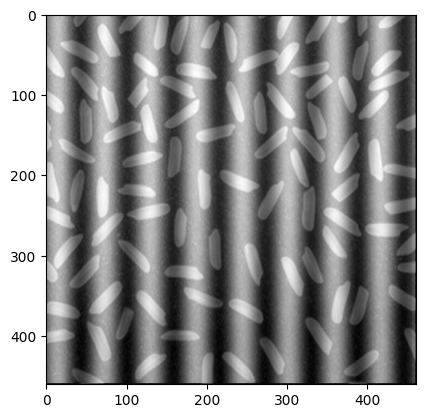

In [4]:
# read input as grayscale
img = cv2.imread('images/gao.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

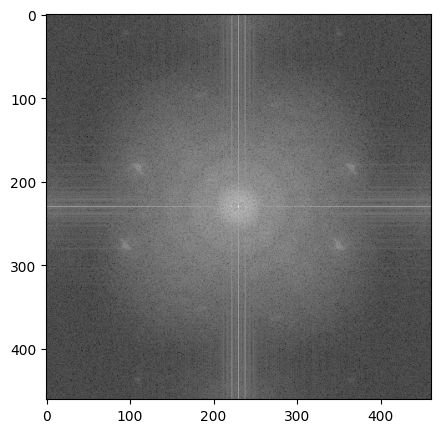

In [5]:
img = cv2.imread('images/gao.png', 0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(5,5))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

In [6]:
print(dft_shift.shape)  
print(magnitude_spectrum.shape)


(461, 461, 2)
(461, 461)


Yêu cầu: Hoàn thiện hàm local_maximum

Input:
- spec: phổ của ảnh đầu vào
- win_size: kích thước cửa sổ
- thresh: ngưỡng 

Output: max_pos - tọa độ cực đại địa phương cần loại bỏ

In [7]:
import numpy as np
from scipy.ndimage import maximum_filter

def local_maximum(spec, win_size, thresh):
    max_pos = []
    max_spec = maximum_filter(spec, footprint=np.ones((win_size, win_size)))
    for i in range(spec.shape[0]):
        for j in range(spec.shape[1]):
            if spec[i, j] == max_spec[i, j] and spec[i, j] > thresh:
                max_pos.append((i, j))            
    
    return max_pos


In [8]:
img = cv2.imread('images/gao.png', 0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
print(magnitude_spectrum[230,230])

344.19766


Tọa độ các cực đại cần loại bỏ: [(0, 178), (0, 198), (0, 293), (0, 309), (1, 141), (1, 426), (1, 438), (1, 450), (2, 401), (3, 387), (5, 151), (5, 230), (5, 319), (5, 333), (5, 369), (6, 19), (7, 47), (13, 64), (14, 132), (15, 298), (16, 263), (18, 25), (18, 113), (19, 230), (20, 167), (21, 351), (21, 371), (22, 419), (23, 2), (23, 93), (23, 320), (24, 394), (25, 70), (27, 48), (28, 12), (30, 451), (31, 127), (33, 167), (35, 94), (35, 112), (35, 426), (35, 436), (36, 187), (37, 399), (38, 0), (38, 40), (38, 264), (40, 15), (40, 275), (42, 140), (43, 230), (43, 415), (44, 302), (44, 371), (46, 94), (48, 185), (50, 60), (52, 47), (52, 71), (53, 441), (56, 404), (56, 418), (57, 5), (58, 107), (58, 372), (59, 32), (60, 127), (60, 167), (63, 442), (65, 50), (65, 63), (65, 389), (65, 457), (69, 369), (69, 421), (70, 278), (73, 402), (76, 289), (77, 26), (77, 182), (78, 0), (80, 66), (81, 278), (83, 151), (83, 418), (84, 138), (84, 350), (84, 392), (85, 267), (86, 51), (87, 167), (88, 402), (

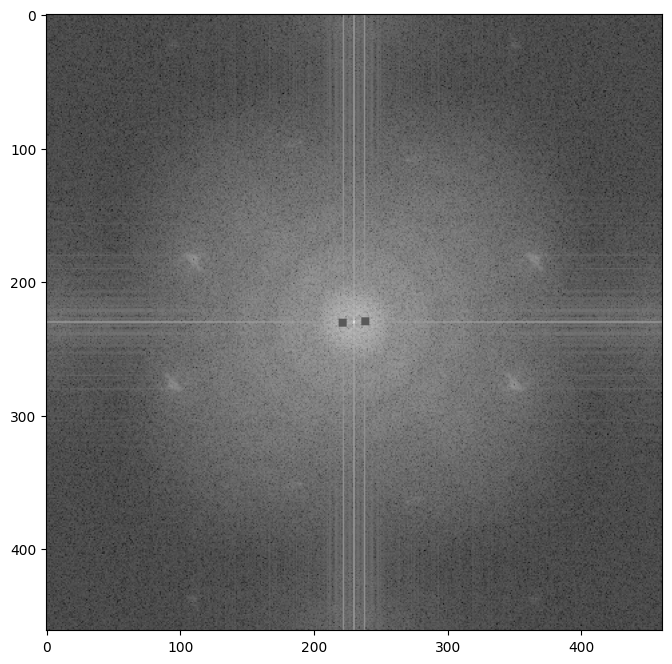

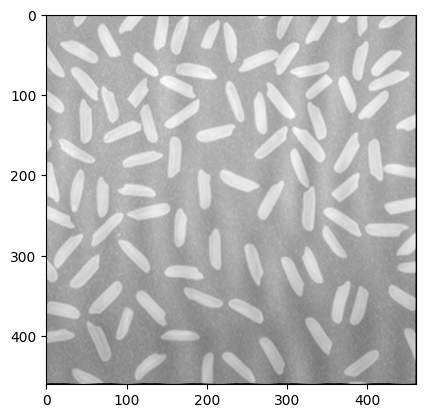

In [9]:
### YOUR CODE HERE
# Giả sử 'magnitude_spectrum' là phổ ảnh đã tính
img = cv2.imread('images/gao.png', 0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
win_size = 20
thresh = np.max(magnitude_spectrum) * 0.2

max_pos = local_maximum(magnitude_spectrum, win_size, thresh)
print("Tọa độ các cực đại cần loại bỏ:", max_pos)

for i in range(len(max_pos)):
    x, y = max_pos[i]
    if x==y:
        dft_shift[x-3:x+3, y+6:y+12] = 255
        dft_shift[-x-3:-x+3, -y-12:-y-6] = 255

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()
dft_ishift = np.fft.ifftshift(dft_shift)
idft = cv2.idft(dft_ishift)
img_back = cv2.magnitude(idft[:,:,0],idft[:,:,1])
plt.imshow(img_back, cmap = 'gray')
plt.show()




# Xây dựng chuỗi xử lý nhiễu

Yêu cầu: Xây dựng một chuỗi xử lý chung cho nhiều loại nhiễu khác nhau, cần kết hợp các chiến thuật đã học một cách hợp lý, có thể thay đổi tham số truyền vào

## Ảnh cần xử lý

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

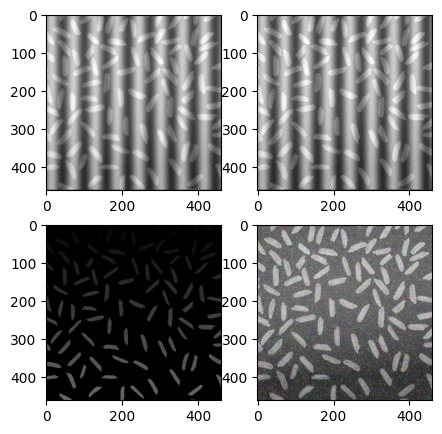

In [11]:
img_names = os.listdir('images/')
plt.figure(figsize=(5,5)) 
for i, img_name in enumerate(img_names):
    img = cv2.imread(os.path.join('images/', img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # for showing purpose
    plt.subplot(2,2,i+1)
    plt.imshow(img) 
plt.show()

In [12]:
def denoise_series(img_path):
    img = cv2.imread(img_path, 0)
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    win_size = 20
    thresh = np.max(magnitude_spectrum) * 0.2
    max_pos = local_maximum(magnitude_spectrum, win_size, thresh)
    for i in range(len(max_pos)):
        x, y = max_pos[i]
        if x==y:
            dft_shift[x-3:x+3, y+6:y+12] = 255
            dft_shift[-x-3:-x+3, -y-12:-y-6] = 255
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    dft_ishift = np.fft.ifftshift(dft_shift)
    idft = cv2.idft(dft_ishift)
    img_back = cv2.magnitude(idft[:,:,0],idft[:,:,1])
    img_back = cv2.medianBlur(img_back, 5)
    img_back = cv2.GaussianBlur(img_back, (5, 5), 0)
    img_back = cv2.bilateralFilter(img_back, 9, 75, 75)
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Input Image')
    plt.subplot(1,2,2)
    plt.imshow(img_back, cmap = 'gray')
    plt.title('Output Image')
    plt.show()
    return img_back

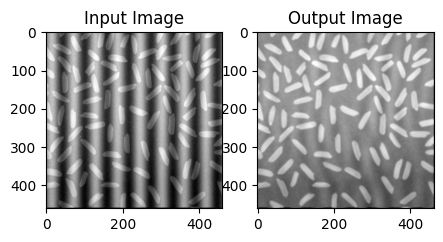

In [13]:
img_path = 'images/gao.png'
img = cv2.imread(img_path, 0)
img_back = denoise_series(img_path)
# plt.imshow(img_back, cmap = 'gray')

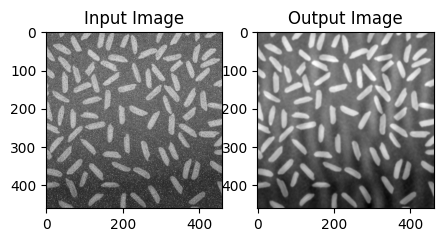

array([[22417666., 22302884., 21989552., ..., 20516570., 20332054.,
        20244228.],
       [22377394., 22299956., 22065124., ..., 20471132., 20310156.,
        20235204.],
       [22289302., 22282232., 22202864., ..., 20366160., 20277738.,
        20239830.],
       ...,
       [12331824., 12264178., 12079965., ..., 12530606., 12438150.,
        12363606.],
       [12277187., 12205769., 12016215., ..., 12686084., 12423303.,
        12272387.],
       [12243343., 12172692., 11986394., ..., 12779630., 12423811.,
        12230852.]], dtype=float32)

In [14]:
denoise_series('images/gao2.png')

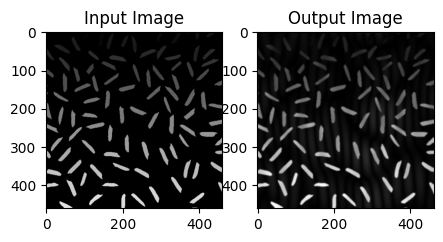

array([[365097.38, 328734.38, 248816.92, ..., 683227.75, 620083.  ,
        591888.6 ],
       [364309.84, 328040.12, 248341.7 , ..., 681002.6 , 618444.  ,
        590556.3 ],
       [362586.22, 326545.12, 247370.81, ..., 675765.2 , 614461.1 ,
        587208.5 ],
       ...,
       [376883.16, 339854.8 , 258431.73, ..., 706864.  , 642249.9 ,
        613744.5 ],
       [374463.5 , 337261.25, 255712.61, ..., 701389.1 , 637248.75,
        608927.06],
       [373571.12, 336270.28, 254618.66, ..., 699048.3 , 635122.9 ,
        606885.3 ]], dtype=float32)

In [15]:
denoise_series('images/gao3.png')